# Análisis de la salud mental en el sector tecnológico

Este proyecto analiza los resultados de la encuesta *Mental Health in Tech Survey*
realizada a profesionales del sector tecnológico. El objetivo es explorar la
relación entre el entorno laboral y la salud mental, identificando patrones
relacionados con el acceso a tratamiento, el apoyo empresarial y factores
personales como el género o los antecedentes familiares.

En este proyecto se analizan los resultados de una encuesta realizada en 2014 sobre salud mental en el sector tecnológico. A pesar de no ser reciente, los datos siguen siendo relevantes para analizar patrones, percepciones y relaciones entre variables, ya que los problemas de salud mental en el ámbito laboral persisten en la actualidad.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("mental_health_tech.csv")


## Exploración inicial de los datos

En esta sección se realiza una exploración inicial del dataset con el fin de
comprender su estructura, los tipos de variables disponibles y la calidad de los
datos. Se revisan las primeras filas con `df.head()`, la información general
con `df.info()` y un resumen estadístico con `df.describe(include='all')`.  

Se mencionan algunas variables clave que serán analizadas más adelante:
- `Age` (edad de los encuestados)
- `Gender` (género)
- `treatment` (búsqueda de tratamiento psicológico)
- `work_interfere` (interferencia del trabajo en la salud mental)
- `family_history` (antecedentes familiares)
- `benefits` (beneficios de salud mental en la empresa)

Este análisis
permite detectar valores nulos, inconsistencias y posibles problemas que deberán
ser tratados en fases posteriores.


In [2]:
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [4]:
df.describe(include='all')


,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
count,1259,1.259000e+03,1259,1259,744,1241,1259,1259,995,1259,...,1259,1259,1259,1259,1259,1259,1259,1259,1259,164
unique,1246,NaN,49,48,45,2,2,2,4,6,...,5,3,3,3,3,3,3,3,2,160
top,2014-08-27 12:31:41,NaN,Male,United States,CA,No,No,Yes,Sometimes,6-25,...,Don't know,No,No,Some of them,Yes,No,Maybe,Don't know,No,* Small family business - YMMV.
freq,2,NaN,615,751,138,1095,767,637,465,290,...,563,490,925,774,516,1008,557,576,1075,5
mean,NaN,7.942815e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,2.818299e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,-1.726000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,2.700000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,3.100000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,3.600000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Conclusiones de la exploración inicial

El dataset analizado contiene 1259 respuestas de profesionales del sector
tecnológico. Se observa una combinación de variables numéricas y categóricas,
siendo la mayoría de estas últimas respuestas de tipo texto. Durante la
exploración se han detectado valores nulos en columnas relevantes como
`work_interfere`, así como una elevada diversidad de respuestas en la variable
`Gender`, lo que dificulta su análisis directo. Además, la variable `Age`
presenta valores extremos no realistas, por lo que será necesario filtrar el
rango de edades. Estos resultados indican la necesidad de una fase de limpieza
previa antes de realizar análisis visuales y extraer conclusiones.



## Limpieza de datos

En esta sección se realiza la limpieza del conjunto de datos con el objetivo de
mejorar su calidad y fiabilidad. Se abordarán problemas detectados en la fase de
exploración, como valores extremos en la edad, inconsistencias en el género (diferencias por mayúsculas/minúsculas y abreviaturas) y la presencia de valores nulos en columnas clave.


### Filtrado de valores no realistas en la edad

Durante la exploración se detectaron valores extremos en la variable `Age` que no
resultan realistas. Para evitar que estos valores distorsionen el análisis, se
filtrarán únicamente las edades comprendidas entre 18 y 100 años.


In [5]:
df = df[df["Age"].between(18, 100)]


### Normalización de la variable género

La variable `Gender` presenta múltiples formatos para referirse al mismo género
debido a diferencias en mayúsculas, abreviaturas y respuestas libres. Para
facilitar el análisis, se unifican las respuestas en tres categorías:
`Male`, `Female` y `Other`.


In [6]:
def clean_gender(g):
    g = str(g).lower().strip()
    if g in ["male", "m"]:
        return "Male"
    elif g in ["female", "f"]:
        return "Female"
    else:
        return "Other"

df["Gender_clean"] = df["Gender"].apply(clean_gender)


### Tratamiento de valores nulos

Algunas columnas relevantes contienen valores nulos, especialmente aquellas
relacionadas con el impacto del trabajo en la salud mental. Para mantener el
máximo número de registros sin introducir sesgos, los valores nulos de la
variable `work_interfere` se reemplazan por la categoría `Unknown`.


In [7]:
df["work_interfere"] = df["work_interfere"].fillna("Unknown")


### Conclusiones de la limpieza de datos

Tras el proceso de limpieza, el dataset presenta un rango de edades realista,
una variable de género normalizada y una reducción del impacto de los valores
nulos en columnas clave. Estas modificaciones permiten realizar análisis y
visualizaciones de forma más fiable, garantizando que los resultados obtenidos
reflejen patrones reales y no inconsistencias del conjunto de datos.


## Búsqueda de tratamiento psicológico

En esta sección se analiza cuántas personas han buscado tratamiento psicológico
en relación con su salud mental. La variable `treatment` es clave para comprender la
magnitud del problema dentro del sector tecnológico.


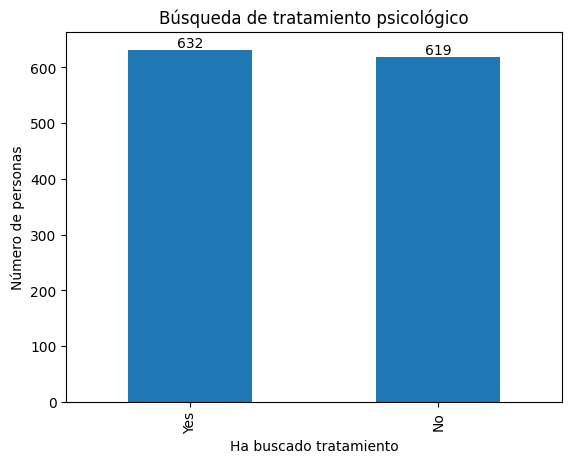

In [9]:
treatment_counts = df["treatment"].value_counts()
ax = treatment_counts.plot(kind="bar")

for i, v in enumerate(treatment_counts):
    ax.text(i, v + 5, str(v), ha="center")

plt.xlabel("Ha buscado tratamiento")
plt.ylabel("Número de personas")
plt.title("Búsqueda de tratamiento psicológico")
plt.show()


### Análisis

La distribución de la variable es prácticamente equilibrada. Un total
de 632 encuestados ha buscado tratamiento psicológico, frente a 619 que no lo han
hecho. Esta diferencia mínima indica que los problemas de salud mental están muy
extendidos en el sector tecnológico, aunque una parte significativa de los
profesionales aún no recurre a ayuda especializada, posiblemente debido a
barreras sociales, laborales o personales.


## Relación entre antecedentes familiares y tratamiento psicológico

En esta sección se analiza si la presencia de antecedentes familiares de
problemas de salud mental influye en la probabilidad de que los profesionales del
sector tecnológico busquen tratamiento psicológico.
Cruza las variables `family_history` y `treatment`.

In [10]:
family_treatment = pd.crosstab(df["family_history"], df["treatment"])
family_treatment


treatment,No,Yes
family_history,,
No,492,270
Yes,127,362


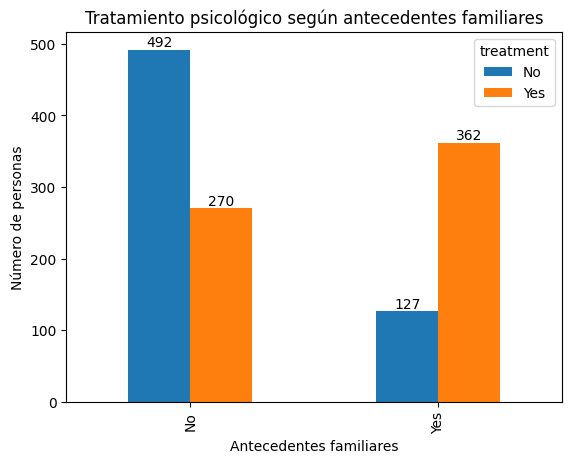

In [11]:
ax = family_treatment.plot(kind="bar")

for container in ax.containers:
    ax.bar_label(container)

plt.xlabel("Antecedentes familiares")
plt.ylabel("Número de personas")
plt.title("Tratamiento psicológico según antecedentes familiares")
plt.show()


### Análisis

Los resultados muestran una diferencia clara entre los encuestados con y sin
antecedentes familiares de problemas de salud mental. Las personas que declaran
tener antecedentes familiares presentan una mayor proporción de búsqueda de
tratamiento psicológico en comparación con aquellas que no los tienen. Esto
sugiere que la experiencia previa o la concienciación dentro del entorno
familiar puede reducir el estigma y facilitar la decisión de acudir a ayuda
profesional.


## Impacto del trabajo en la salud mental

En esta sección se analiza cómo los profesionales del sector tecnológico perciben
la influencia de su trabajo en su salud mental. Para ello se utiliza la variable
`work_interfere`, que refleja la frecuencia con la que el trabajo interfiere en el
bienestar psicológico.


In [14]:
order = ["Never", "Rarely", "Sometimes", "Often", "Unknown"]

work_counts = df["work_interfere"].value_counts().reindex(order)


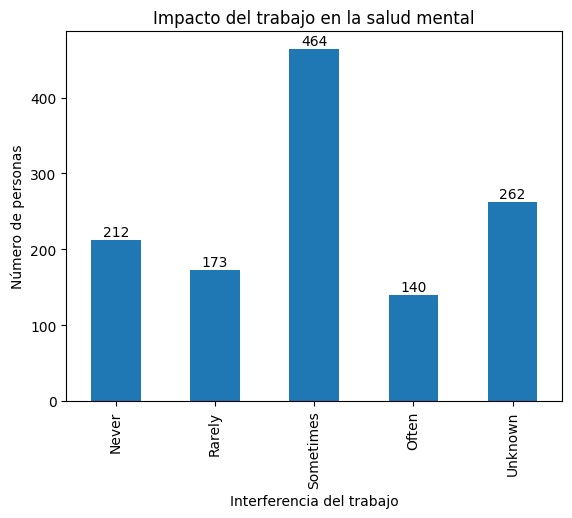

In [15]:
ax = work_counts.plot(kind="bar")

for i, v in enumerate(work_counts):
    ax.text(i, v + 5, str(v), ha="center")

plt.xlabel("Interferencia del trabajo")
plt.ylabel("Número de personas")
plt.title("Impacto del trabajo en la salud mental")
plt.show()


### Análisis

Los resultados indican que una parte significativa de los encuestados afirma que
su trabajo interfiere en su salud mental de forma frecuente o en algunas
ocasiones. Aunque una parte de los participantes señala que el trabajo rara vez
o nunca afecta a su bienestar psicológico, la presencia de respuestas como
`Often` y `Sometimes` pone de manifiesto que el entorno laboral puede actuar como
un factor de riesgo relevante en el sector tecnológico.


## Disponibilidad de beneficios de salud mental

En esta sección se analiza la variable `benefits`, que refleja si los
empleados disponen de beneficios relacionados con la salud mental en su empresa
y si los conocen. Este análisis permite identificar posibles lagunas de
información o falta de políticas de apoyo en el entorno laboral.


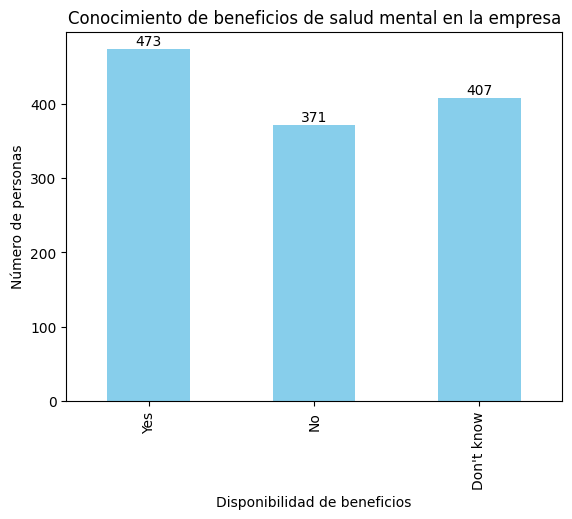

In [18]:
# Defino un orden lógico para la gráfica
order = ["Yes", "No", "Don't know"]

# Cuenta los valores y reindexa
benefits_counts = df["benefits"].value_counts().reindex(order)

# Gráfica con números sobre barras
ax = benefits_counts.plot(kind="bar", color="skyblue")

for i, v in enumerate(benefits_counts):
    ax.text(i, v + 5, str(v), ha="center")

plt.xlabel("Disponibilidad de beneficios")
plt.ylabel("Número de personas")
plt.title("Conocimiento de beneficios de salud mental en la empresa")
plt.show()


### Análisis

La mayoría de los empleados sí sabe que su empresa ofrece beneficios de salud
mental, mientras que otros responden que no o que no saben. La presencia
de un número significativo de personas que no conocen estos beneficios indica
una falta de comunicación interna o transparencia en las empresas, lo que puede
reducir el acceso a recursos de apoyo psicológico.


## Relación entre edad y búsqueda de tratamiento

Se analiza si la edad de los encuestados (`Age`) influye en la probabilidad de
haber buscado tratamiento psicológico (`treatment`).  
Se utiliza un histograma proporcional separado por categorías de tratamiento para
visualizar claramente la distribución de edades entre quienes sí y quienes no
han buscado ayuda.


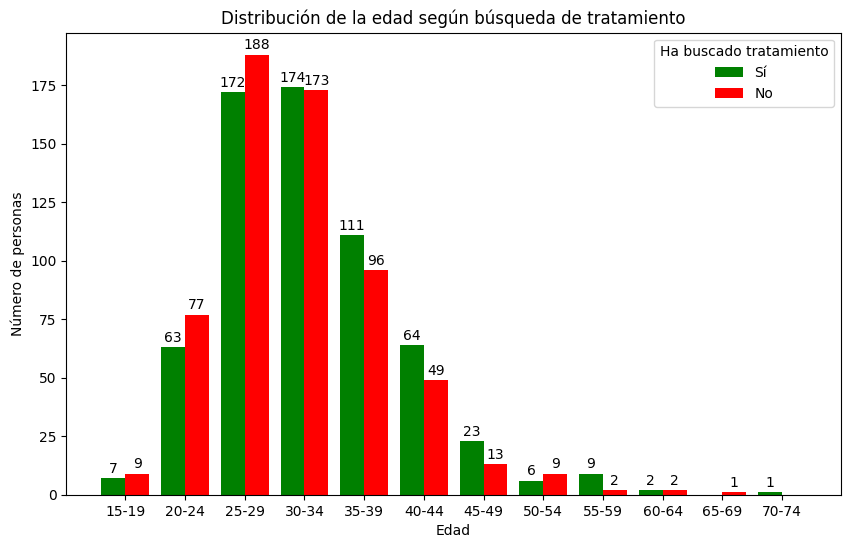

In [29]:
import matplotlib.pyplot as plt
import numpy as np

# Definir bins de 5 años
bins = range(int(df["Age"].min()//5*5), int(df["Age"].max()//5*5)+6, 5)

# Contar los datos
yes_counts, _ = np.histogram(df[df["treatment"]=="Yes"]["Age"], bins=bins)
no_counts, _ = np.histogram(df[df["treatment"]=="No"]["Age"], bins=bins)

# Posiciones de las barras
x = np.arange(len(bins)-1)
width = 0.4

plt.figure(figsize=(10,6))
plt.bar(x - width/2, yes_counts, width, label="Sí", color="green")
plt.bar(x + width/2, no_counts, width, label="No", color="red")

# Números sobre las barras
for i in range(len(x)):
    if yes_counts[i]>0:
        plt.text(i - width/2, yes_counts[i]+1, str(yes_counts[i]), ha="center", va="bottom")
    if no_counts[i]>0:
        plt.text(i + width/2, no_counts[i]+1, str(no_counts[i]), ha="center", va="bottom")

# Etiquetas
plt.xticks(x, [f"{bins[i]}-{bins[i+1]-1}" for i in range(len(bins)-1)])
plt.xlabel("Edad")
plt.ylabel("Número de personas")
plt.title("Distribución de la edad según búsqueda de tratamiento")
plt.legend(title="Ha buscado tratamiento")
plt.show()


### Análisis

El histograma muestra que la distribución de edades es bastante similar entre
quienes han buscado tratamiento y quienes no. Se observa que la mayoría de los
encuestados se concentra entre los 25 y 40 años.  
Aunque la diferencia no es muy marcada, se aprecia que los más jóvenes tienen
una ligera tendencia a buscar tratamiento, lo que podría reflejar una mayor
concienciación o menor estigmatización respecto a la salud mental en las
generaciones más recientes.


## Relación entre género y búsqueda de tratamiento

Se analiza si existe diferencia entre géneros en la probabilidad de buscar
tratamiento psicológico (`treatment`). La variable de género (`Gender_clean`) ha sido
normalizada en tres categorías: `Male`, `Female` y `Other`.


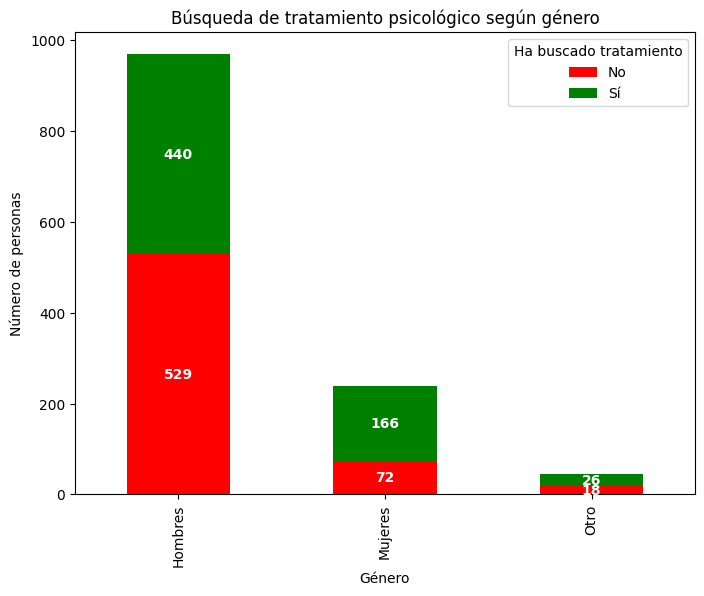

In [33]:
# Traducimos los nombres del índice
df["Gender_clean_es"] = df["Gender_clean"].replace({
    "Male": "Hombres",
    "Female": "Mujeres",
    "Other": "Otro"
})

# Tabla de conteo con nombres en español
gender_treatment_es = pd.crosstab(df["Gender_clean_es"], df["treatment"])

# Gráfica apilada
ax = gender_treatment_es.plot(kind="bar", stacked=True, figsize=(8,6), color=["red","green"])

# Números centrados en cada segmento
for i, gender in enumerate(gender_treatment_es.index):
    bottom = 0
    for treatment, color in zip(gender_treatment_es.columns, ["red","green"]):
        count = gender_treatment_es.loc[gender, treatment]
        if count > 0:
            ax.text(i, bottom + count/2, str(count), ha="center", va="center", color="white", fontweight="bold")
        bottom += count

# Etiquetas y leyenda en español
plt.xlabel("Género")
plt.ylabel("Número de personas")
plt.title("Búsqueda de tratamiento psicológico según género")
plt.legend(["No", "Sí"], title="Ha buscado tratamiento")
plt.show()


### Análisis

En el dataset hay muchos más hombres (`Male`) que mujeres (`Female`) trabajando
en el sector tecnológico.  
Si tenemos en cuenta este desbalance:

- Entre las mujeres, **una mayor proporción ha buscado tratamiento**.  
- Entre los hombres, **aunque son más en número**, la mayoría no ha buscado tratamiento.  

La categoría `Other` tiene pocos registros, pero también muestra tendencia a
buscar ayuda.  
Esto indica que, proporcionalmente, las mujeres recurren más a tratamiento
psicológico que los hombres, y resalta la importancia de considerar la
distribución de género al interpretar los resultados.


## Conclusiones finales

El análisis del dataset *Mental Health in Tech Survey* permite extraer varias conclusiones relevantes sobre la salud mental en el sector tecnológico:

1. **Búsqueda de tratamiento psicológico (`treatment`)**:  
   Un número significativo de profesionales ha buscado tratamiento (632 de 1251), mientras que 619 no lo han hecho. Esto muestra que la salud mental es un tema relevante y presente, aunque todavía existen barreras para acceder a ayuda profesional.

2. **Antecedentes familiares (`family_history`)**:  
   Los encuestados con antecedentes familiares de problemas de salud mental tienen mayor probabilidad de buscar tratamiento. Esto sugiere que la experiencia previa o la concienciación en el entorno familiar puede facilitar la decisión de acudir a ayuda profesional.

3. **Impacto del trabajo (`work_interfere`)**:  
   Una proporción considerable indica que su trabajo interfiere en su salud mental. Esto evidencia que el entorno laboral en el sector tecnológico puede actuar como un factor de riesgo para el bienestar psicológico.

4. **Beneficios de salud mental (`benefits`)**:  
   Aunque algunas empresas ofrecen beneficios, muchos empleados no los conocen o no están seguros de su disponibilidad. Esto resalta la importancia de mejorar la comunicación interna y las políticas de apoyo a la salud mental.

5. **Edad (`Age`)**:  
   La mayoría de los encuestados se concentra entre 25 y 40 años. Se observa una ligera tendencia de los más jóvenes a buscar tratamiento, lo que podría reflejar mayor concienciación y menor estigmatización en generaciones recientes.

6. **Género (`Gender_clean`)**:  
   Hay una mayor proporción de hombres que mujeres en el sector tecnológico. Sin embargo, proporcionalmente, más mujeres han buscado tratamiento que hombres. Entre los hombres, aunque hay más en número, la mayoría no ha buscado tratamiento. La categoría `Otro` es pequeña, pero también muestra tendencia a buscar ayuda. Esto indica que las mujeres parecen más propensas a recurrir a ayuda psicológica, y la interpretación de los datos debe considerar el desbalance de género.

---

**Conclusión general:**  
Este estudio presenta algunas limitaciones, como el desbalance de género en la muestra y la antigüedad del dataset, lo que puede afectar la generalización de los resultados.

Aún así, la encuesta revela que la salud mental es un tema relevante y presente en el sector tecnológico, con factores personales (edad, antecedentes familiares, género) y laborales (interferencia del trabajo, desconocimiento de beneficios) que influyen en la búsqueda de tratamiento.

Para mejorar el bienestar de los empleados, las empresas deberían aumentar la concienciación, ofrecer y comunicar claramente los beneficios de salud mental y prestar atención al impacto del entorno laboral.

